In [4]:
import pandas as pd
import numpy as np
# reading the excel file using read_excel function of pandas 
data = pd.read_excel('training.xlsx')
# seperating the data into two classes
class_1_data = data[data['output'] == 0].iloc[:, :-1]
class_2_data = data[data['output'] == 1].iloc[:, :-1]
#finding the centroid and spread for class 1 and class 2
centroid_class_1 = class_1_data.mean(axis=0)
centroid_class_2 = class_2_data.mean(axis=0)
spread_class_1 = class_1_data.std(axis=0)
spread_class_2 = class_2_data.std(axis=0)
# finding the interclass distance using norm function
interclass_distance = np.linalg.norm(centroid_class_1 - centroid_class_2)
print("Class 1 Centroid:")
print(centroid_class_1)
print("\nClass 1 Spread:")
print(spread_class_1)
print("\nClass 2 Centroid:")
print(centroid_class_2)
print("\nClass 2 Spread:")
print(spread_class_2)
print("\nInterclass Distance:", interclass_distance)


Class 1 Centroid:
embed_0     -0.153674
embed_1      0.211456
embed_2      0.155295
embed_3      0.093863
embed_4     -0.488665
               ...   
embed_379   -0.165440
embed_380   -0.152975
embed_381   -0.008719
embed_382    0.276078
embed_383   -0.030131
Length: 384, dtype: float64

Class 1 Spread:
embed_0      0.294157
embed_1      0.089135
embed_2      0.119411
embed_3      0.116298
embed_4      0.148771
               ...   
embed_379    0.179513
embed_380    0.249280
embed_381    0.095489
embed_382    0.233278
embed_383    0.161591
Length: 384, dtype: float64

Class 2 Centroid:
embed_0     -0.184075
embed_1      0.137983
embed_2      0.104661
embed_3      0.127538
embed_4     -0.408991
               ...   
embed_379   -0.153687
embed_380   -0.141090
embed_381    0.004908
embed_382    0.271903
embed_383   -0.027964
Length: 384, dtype: float64

Class 2 Spread:
embed_0      0.205344
embed_1      0.169176
embed_2      0.190184
embed_3      0.165142
embed_4      0.180539
         

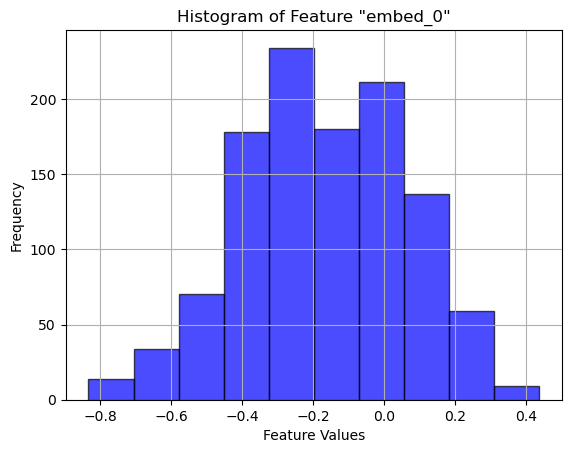

Mean: -0.17029445322602035
Variance: 0.05343827792925803


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# reading the excel file using read_excel function of pandas 
data = pd.read_excel('training.xlsx')
# taking the feature "embed_0"
feature_data = data['embed_0']
# plotting the histogram for  embed_0 with 10 bins
hist, bins = np.histogram(feature_data, bins=10)  # You can adjust the number of bins as needed
plt.hist(feature_data, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature "embed_0"')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# calculating the mean and variance
mean = np.mean(feature_data)
variance = np.var(feature_data)

print("Mean:", mean)
print("Variance:", variance)


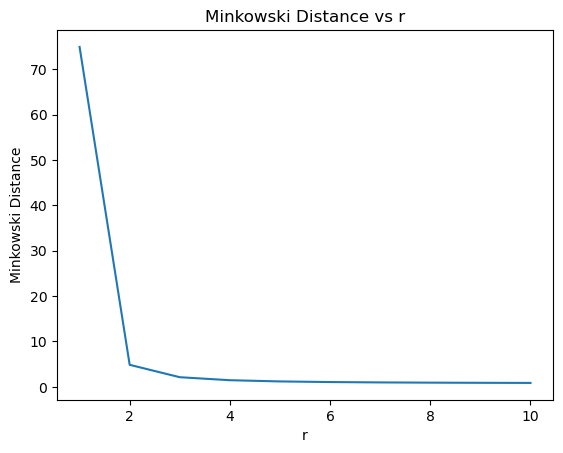

In [6]:
from scipy.spatial.distance import minkowski

# taking  2 features
feature_vector1 = data.iloc[0, :]  # Example feature vector 1
feature_vector2 = data.iloc[1, :]  # Example feature vector 2
# plotting the Minkowski distance vs r
r_values = range(1, 11)
distances = []

for r in r_values:
    distance = minkowski(feature_vector1, feature_vector2, r)
    distances.append(distance)

plt.plot(r_values, distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# taking all columns except output for x
X = data.drop(columns=['output'])   
# taking output column
y = data['output']  
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [8]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_excel('training.xlsx')
# dividing the classes into 2 classes 
def convert_to_binary_class(value):
    if value < 1:
        return 0
    elif value > 4:
        return 0
    else:
        return 1
    
data['output'] = data['output'].apply(convert_to_binary_class)
# creating the new dataset with binary classes without distrubing the original 
data.to_excel('modified_dataset.xlsx', index=False)
data = pd.read_excel('modified_dataset.xlsx')   
X = data.drop('output', axis=1)
y = data['output']
#   scaling the data or standeradizing the data using z score method 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# training and testing 
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train, y_train)
# predicting the output 
y_pred = knn.predict(X_test)
# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7699115044247787


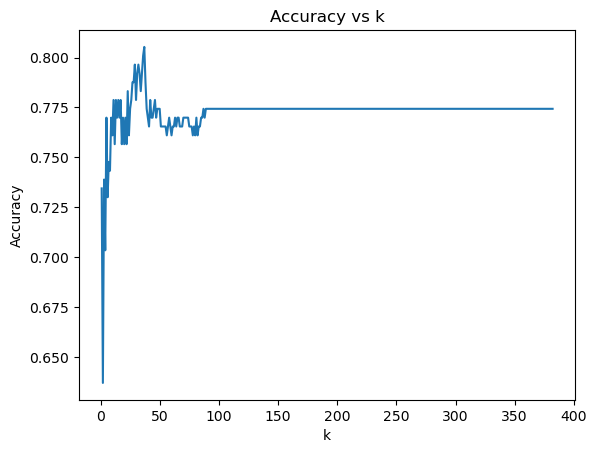

In [10]:
accuracy_values = []
#finding the accuracy vs k for max of k 
k_values = range(1, 383)  
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_values.append(accuracy)

plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()


In [11]:
predictions = neigh.predict(X_test)
print("Predictions:", predictions)


Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
#
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

Precision: 0.7699115044247787 Recall: 0.7699115044247787 F1 Score: 0.7699115044247787


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

Confusion Matrix (Training Data):
 [[166  89]
 [ 43 602]]
Precision (Training Data): 0.8712011577424024
Recall (Training Data): 0.9333333333333333
F1-Score (Training Data): 0.9011976047904192


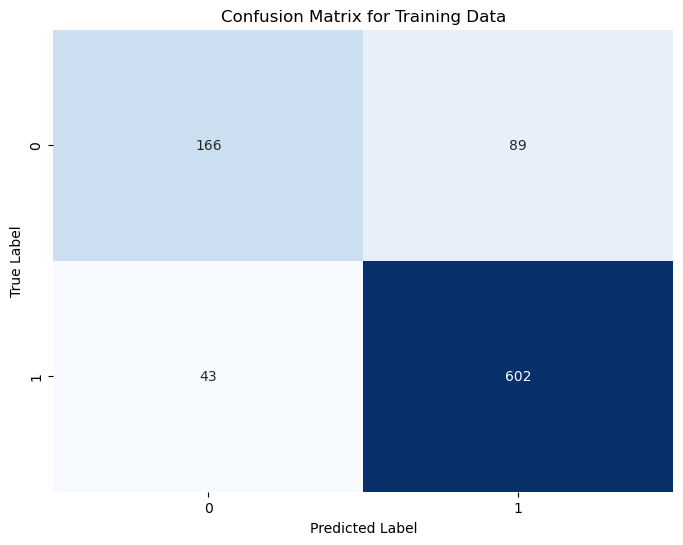

In [20]:
import seaborn as sns
# Predictions on Training Data
y_train_pred = knn.predict(X_train)

# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):\n", conf_matrix_train)

# Precision, Recall, and F1-Score for Training Data
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Precision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_train)

# Display Confusion Matrix with Heatmap for Training Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Training Data')
plt.show()


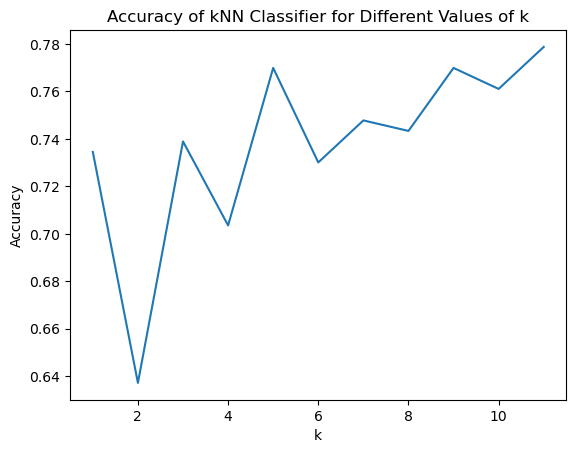

In [21]:
# Initialize lists to store accuracy scores
k_values = range(1, 12)
knn_scores = []

# Loop through different values of k
for k in k_values:
    # Train and test kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_scores.append(knn_accuracy)

# Plotting the accuracy scores
plt.plot(k_values, knn_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different Values of k')
plt.show()
